In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from scipy.stats import skew

In [3]:
from scipy.stats import zscore

In [152]:
df=sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [9]:
df['z-score']=zscore(df['total_bill'])

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,z-score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [16]:

ser1=pd.Series(np.array([1,2,np.nan]),index=list('ABC'))
ser1

A    1.0
B    2.0
C    NaN
dtype: float64

In [18]:
df1=pd.DataFrame({'A':[1,4,np.nan,np.nan],
                 'B':[2,5,7,np.nan],
                 'C':[3,np.nan,np.nan,np.nan]})

df1.head()

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [20]:
df1.isnull().sum()

A    2
B    1
C    3
dtype: int64

In [21]:

df1.dropna() #if any one of the element in a row is null then drop it.

,A,B,C
0,1.0,2.0,3.0


In [22]:
df1.dropna(how='all') # rows in which all element are null then drop it.

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [23]:
df1.dropna(how='all',axis=1) # column in which all element are null then drop it.

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [24]:
df1.dropna(thresh=1)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [29]:
df1.dropna(thresh=1) #at least one non- null value should be there otherwise then drop it

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [31]:
df1.fillna(0) #every column is filled with zero

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,0.0
2,0.0,7.0,0.0
3,0.0,0.0,0.0


In [36]:
df1['A']=df1['A'].fillna(0) #replace one column

In [37]:
df1.head()

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [42]:
df1['A'].fillna(0,inplace=True) # replace one column

In [43]:
df1.head()

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [48]:
df1.fillna(method='ffill')
df1['B'].mean()

4.666666666666667

In [54]:
df1['B'].fillna(df1['B'].mean(),inplace=True)

In [55]:
df1.head()


,A,B,C
0,1.0,2.000000,3.0
1,4.0,5.000000,NaN
2,0.0,7.000000,NaN
3,0.0,4.666667,NaN


In [57]:
df=sns.load_dataset('tips')

In [59]:
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:

import matplotlib.pyplot as plt


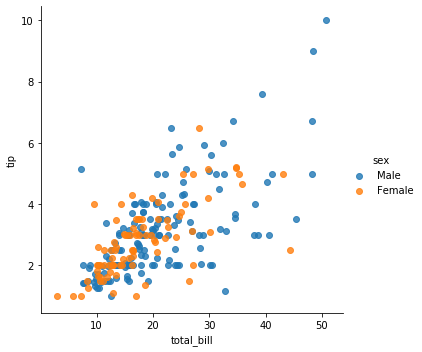

In [69]:
sns.lmplot(x='total_bill',y='tip',data=df,fit_reg=False,hue='sex')
plt.show()

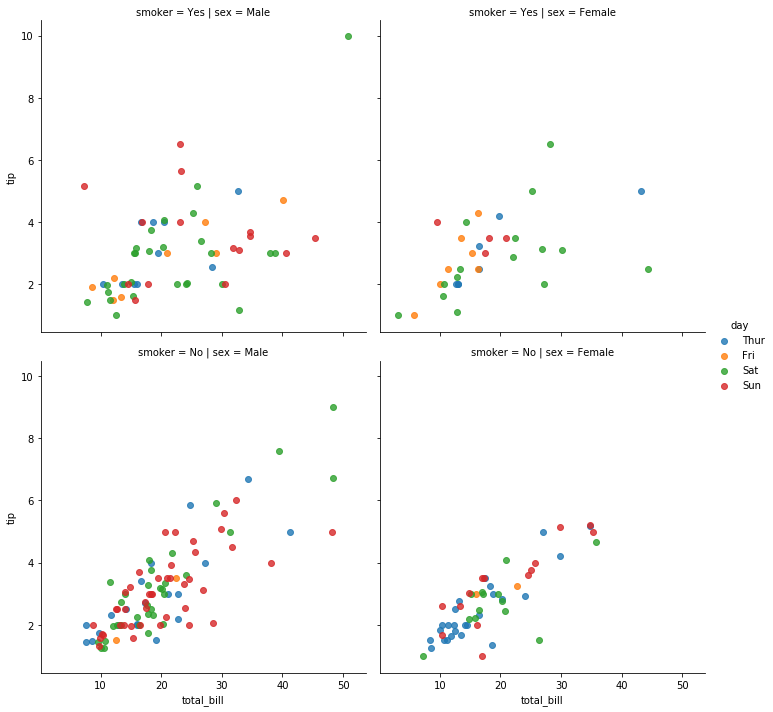

In [83]:

sns.lmplot(x='total_bill',y='tip',data=df,fit_reg=False,hue='day',col='sex',row='smoker')
plt.show()

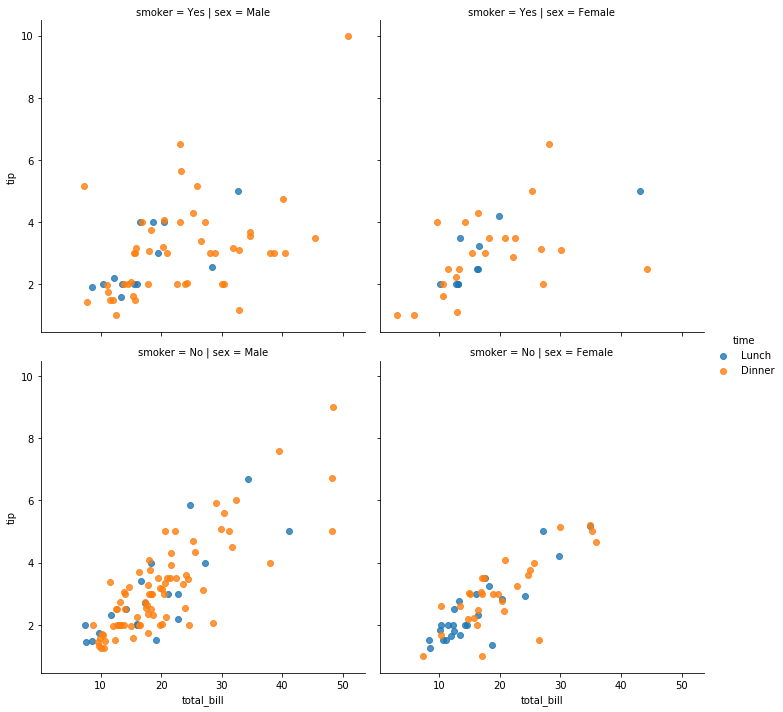

In [88]:

sns.lmplot(x='total_bill',y='tip',data=df,fit_reg=False,hue='time',col='sex',row='smoker')
plt.show()

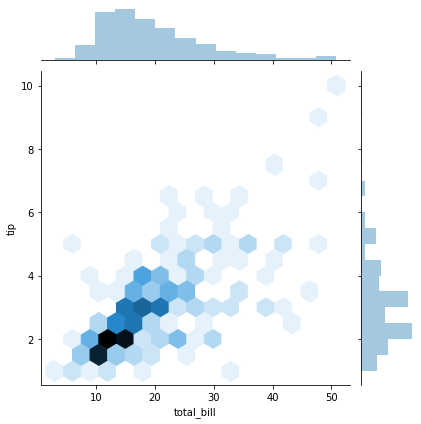

In [92]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')
plt.show()

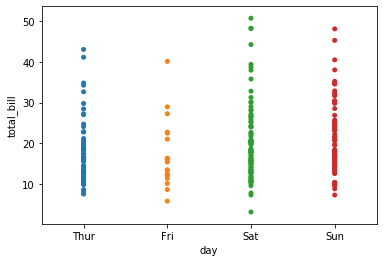

In [96]:
sns.stripplot(x='day',y='total_bill',data=df,jitter=False) #categorical and quantitative data
plt.show()

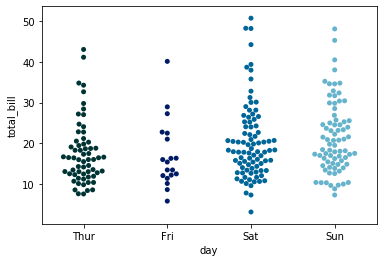

In [101]:
sns.swarmplot(x='day',y='total_bill',data=df,palette='ocean') #point is not overlap over here 
plt.show()

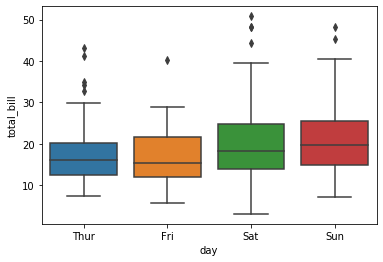

In [100]:
sns.boxplot(x='day',y='total_bill',data=df)
plt.show()

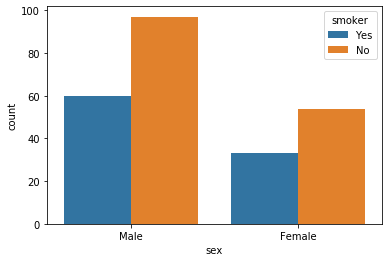

In [104]:
sns.countplot(x='sex',data=df,hue='smoker')
plt.show()


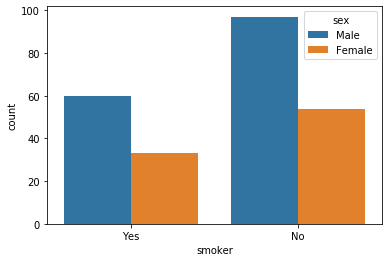

In [105]:
sns.countplot(x='smoker',data=df,hue='sex')
plt.show()



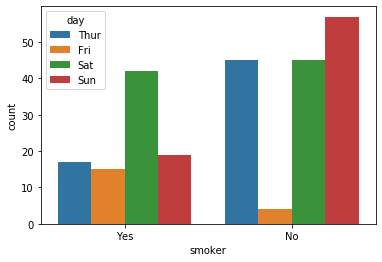

In [106]:
sns.countplot(x='smoker',data=df,hue='day')
plt.show()



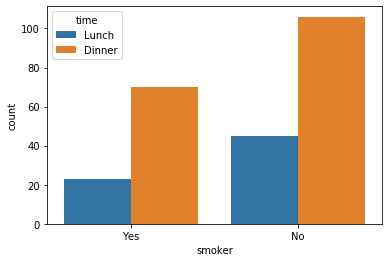

In [107]:
sns.countplot(x='smoker',data=df,hue='time')
plt.show()



In [118]:
tb=df.groupby(['smoker','sex']).agg({'sex':'count','smoker':'count'})

In [119]:
tb

sex  smoker
smoker sex                
Yes    Male     60      60
       Female   33      33
No     Male     97      97
       Female   54      54

In [121]:
df.groupby(['sex','smoker']).count()['size']

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: size, dtype: int64

In [123]:

df.groupby(['sex']).agg({'tip':'max'})

,tip
sex,
Male,10.0
Female,6.5


In [127]:
df.groupby(['sex','day']).agg({'tip':'max'})


tip
sex    day        
Male   Thur   6.70
       Fri    4.73
       Sat   10.00
       Sun    6.50
Female Thur   5.17
       Fri    4.30
       Sat    6.50
       Sun    5.20

In [128]:
#pivot table
df.pivot_table(index='sex',columns='smoker',values='size',aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [142]:
a=pd.crosstab(df['sex'],df['day'])

In [136]:
#df['tip','total_bill'].corr()
cor=df[['tip','total_bill']].corr()
cor

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


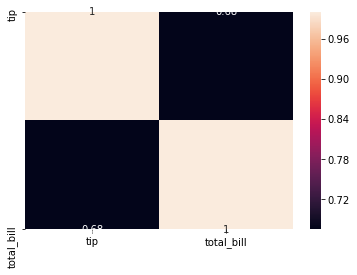

In [141]:

sns.heatmap(cor,annot=True)
plt.show()

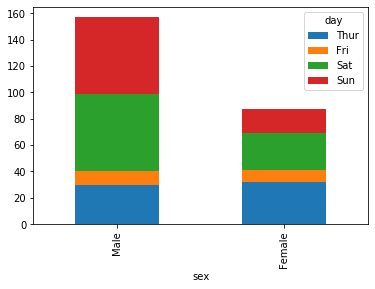

In [150]:
a=pd.crosstab(df['sex'],df['day'])
a.plot(kind='bar',stacked=True)
plt.show()

In [153]:
a=df['sex'][df['smoker']=='Yes'].value_counts()
b=df['sex'][df['smoker']=='No'].value_counts()

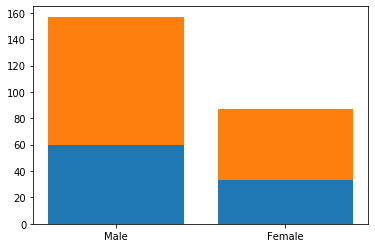

In [157]:
plt.bar(a.index,a.values)
plt.bar(b.index,b.values,bottom=a.values)
plt.show()